## Exercise 08

### Introduction

In these exercises different methods were used to optimize the ground state of a single quantum particle in a one dimensional space. In this specific problem, an external potential is applied on the particle:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$

Since the problem is not analytically solvable, in the Variational Monte Carlo method a the trial wave function is used as a starting point. In this case the trial wave function is given by:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
with parameters $\sigma$ and $\mu$.

### 08.1

$\rightarrow$ *ottimizzazione_delta.cpp*

$\rightarrow$ *medie_lez08.cpp*

In this first part the trial wave function was sampled using the Metropolis algorithm with a uniform transition probability. In order to do so, $\delta$ optimization (to the the 50% acceptance) was carried out through "grid" search as in Lecture 5. Both $\sigma$ and $\mu$ were initially set to 1.

In [12]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

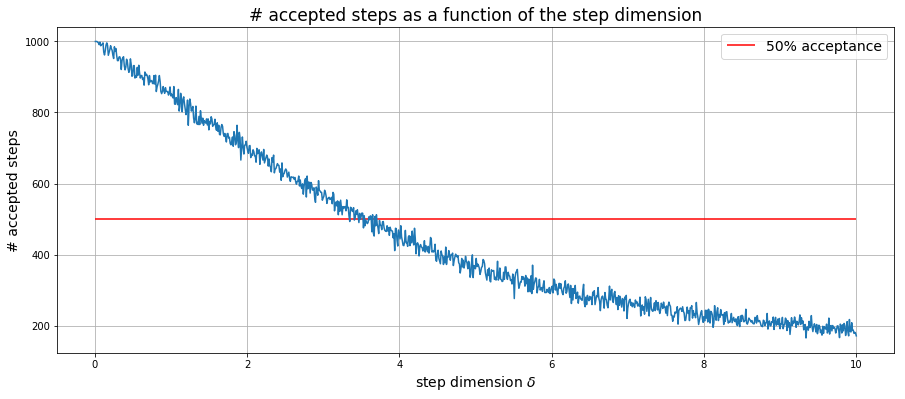

In [6]:
###ottimizzazione di delta
##faccio come nel 5, grid search su tanti valori di delta
M=1000
accepted = np.loadtxt( 'accepted_volta1.dat',max_rows=M ,usecols=4)
delta = np.loadtxt( 'accepted_volta1.dat',max_rows=M ,usecols=1)

plt.figure(figsize=(15,6))

plt.plot(delta,accepted)
plt.xlabel('step dimension $\delta$',size=14)
plt.ylabel('# accepted steps',size=14)
plt.title("# accepted steps as a function of the step dimension", size=17)
plt.hlines(500, min(delta), max(delta), color="red", label = "50% acceptance")
plt.legend(fontsize= 14, loc="upper right")
plt.grid(True)

best delta: 3.49  accepted steps: 499 , error $= \frac{|499-500|}{500} =$ 0.002 

This MC code was then used to evaluate the expectation value for the Hamiltonian,
$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$
Indeed, this can be calculated sampling the trial wave function and evaluating the average energy value. The following graph reports the expectation value for the Hamiltonian using the data-blocking method (100 blocks with 5000 steps each). Before measurements, the code was run 100000 MC steps.

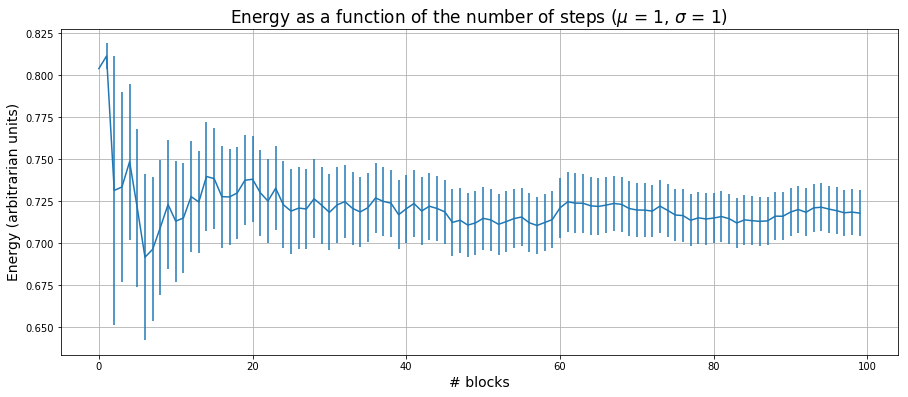

In [5]:
## delta = 3.49

M=100
energy = np.loadtxt( 'medie_volta3.dat',max_rows=M, usecols=3 )
steps = np.arange(M)
energy_err = np.loadtxt( 'medie_volta3.dat',max_rows=M, usecols=4 )

plt.figure(figsize=(15,6))

plt.errorbar(steps,energy, energy_err)
plt.xlabel('# blocks',size=14)
plt.ylabel('Energy (arbitrarian units)',size=14)
plt.title("Energy as a function of the number of steps ($\mu$ = 1, $\sigma$ = 1)", size=17)
plt.grid(True)

### 08.2

$\rightarrow$ ottimizzazione_sigma_mu.cpp

The aim of the second part of the exercise was to look for the best value of $\sigma$ and $\mu$ to minimize  $\langle {\hat H} \rangle_T$. In order to do this a grid search with sigma and mu $ \in [0.5,1.5]$ was performed (*ottimizzazione_sigma_mu.cpp*), changing the values in step of 0.05. Moreover, for each pair of $\sigma, $\mu the algorithm looks for the best $\delta$ so the the acceptance rate is $\approx$ 50%.

Result: $\mu=0.8$,  $\sigma=0.6$ ,  $energy=-0.441339$, $\delta=2.53$

The code was run with 100 blocks of 5000 steps each. The following graph reports the trend of the optimized estimation of $\langle {\hat H} \rangle_T$ as a function of the number of blocks.

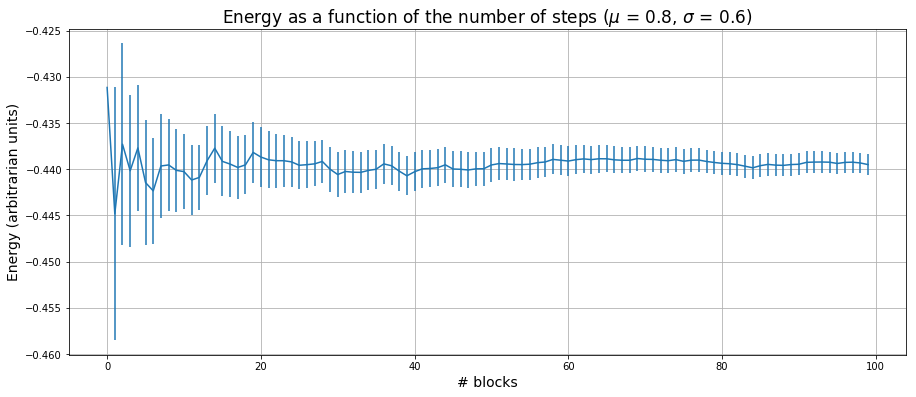

In [4]:
## valori medie dell'energia
## con valori trovati nell'ottimizzazione (mu=0.8, sigma=0.6, delta=2.53)
## l'ho fatto andare prima per 100000 step per equilibrare 
## N = 100 blocchi con 5000 step per ogni blocco

M=100
energy = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=3 )
steps = np.arange(M)
energy_err = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=4 )

plt.figure(figsize=(15,6))

plt.errorbar(steps,energy, energy_err)
plt.xlabel('# blocks',size=14)
plt.ylabel('Energy (arbitrarian units)',size=14)
plt.title("Energy as a function of the number of steps ($\mu$ = 0.8, $\sigma$ = 0.6)", size=17)
plt.grid(True)

The following graph compares the sampled optimized wave function with MC method with the analytic curve of $|\Psi_T(x)|^2$ and with the numerical solution with the matrix method.

In [6]:
## analytical solution psi2 (mu = 0.8, sigma=0.6)
def psi2(x):
    mu=0.8
    sigma=0.6
    psi=np.exp(-((x-mu)**2)/(2*sigma*sigma)) + np.exp(-((x+mu)**2)/(2*sigma*sigma))
    psi2 = psi*psi  ## sono tutte cose reali
    return psi2

In [7]:
## Matrix method
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)
CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
E,psi = np.linalg.eigh(H)
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

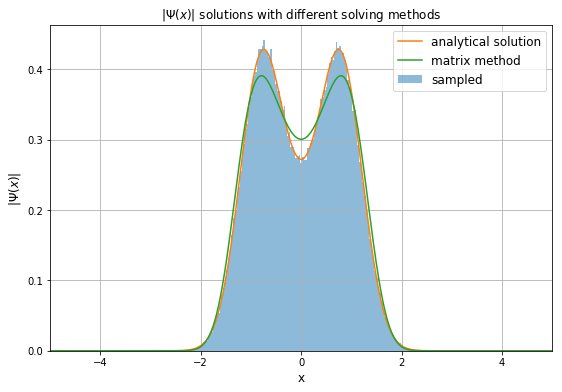

In [26]:
## probability distribution (mu=0.8, sigma=0.6, delta=2.53)

a = 10
N = 300 # number of iterations
x = np.linspace(-a/2, a/2, N)
xmin = np.min(x)
xmax = np.max(x)

### 1. sampling positions 
M=1000000
positions = np.loadtxt( 'instant_energy_posizioni2.dat',max_rows=M, usecols=1 )

### 2. analytical solution
norm, err = integrate.quad( psi2 , xmin, xmax ) ## per trovare la normalizzazione integro tutto
y = psi2(x)

### 3. matrix ->  psi ground state -> (psi[0])**2
x1 = np.linspace(-a/2, a/2, 1000)

### plot
plt.figure(figsize=(9,6))
plt.hist(positions, bins=(x), density=True, alpha=0.5, label="sampled")
plt.plot(x, y/norm, label="analytical solution")
plt.plot(x1, (psi[0])**2 , label = "matrix method")
plt.xlim(xmin, xmax)
plt.xlabel("x", size=12)
plt.title("$|\Psi(x)|$ solutions with different solving methods", size=12)
plt.ylabel("$|\Psi(x)|$" , size=12)
plt.legend(loc="upper right", fontsize=12)
plt.grid(True)
plt.show()

It is possible to notice that while the VMC almost coincide with the analytic solution, it is quite different from the solution obtained with the matrix method. Indeed, on one hand the trial wave function in the analytic solution was also used to sample the probability in the VMC method, while on the other this wave fuction may be a little different from the actual solution of the problem.

### Exercise 08.3

Use the PIMC/PIGS code we have provided to study the same 1D quantum system. Use the PIGS algorithm ($T=0$) to project
- a constant trial wave function, $\Psi_T(x)=1$
- using $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ with the variational parameters you have optimized.

<span style="color:red">Compare your results with those obtained with your VMC code</span>. By using $\Psi_T^{\sigma,\mu}(x)$, how much can you reduce the imaginary time propagation with respect to the first case?

<span style="color:red">Finally, use the PIMC algorithm ($T>0$) to observe how the histogram with the sampled configurations changes by increasing the temperature.</span>

**8.3.1 PIGS** Wave function was sampled with PIGS code ($T=0$). The following histograms compare 1) the wave function sampled with the PIGS code with constant trial wave function $\Psi_T(x)=1$, 2) the same with gaussian trial wave function and 3) the previous optimized VMC solution.

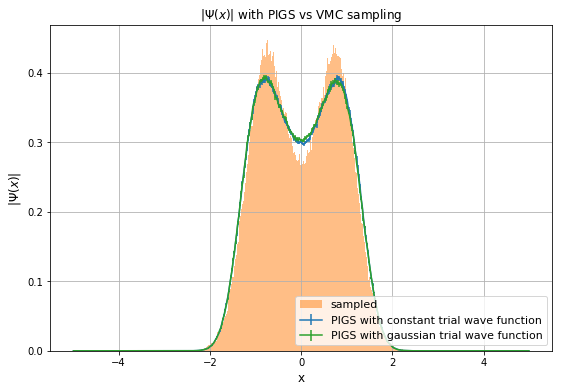

In [27]:
a = 10
N = 500 # number of iterations
x = np.linspace(-a/2, a/2, N)
xmin = np.min(x)
xmax = np.max(x)

### 1. sampling positions VMC
M=1000000
positions = np.loadtxt( 'instant_energy_posizioni2.dat',max_rows=M, usecols=1 )

## PIGS with constant trial wave function
xp= np.loadtxt( './QMC_1D/probability.dat',max_rows=M, usecols=0 )
pigs = np.loadtxt( './QMC_1D/probability.dat',max_rows=M, usecols=1 )
err = np.loadtxt( './QMC_1D/probability.dat',max_rows=M, usecols=2 )

## PIGS with gaussian trial wave function
xp2= np.loadtxt( './QMC_1D/probability2.dat',max_rows=M, usecols=0 )
pigs2 = np.loadtxt( './QMC_1D/probability2.dat',max_rows=M, usecols=1 )
err2 = np.loadtxt( './QMC_1D/probability2.dat',max_rows=M, usecols=2 )

plt.figure(figsize=(9,6))
plt.errorbar(xp, pigs, err, label= "PIGS with constant trial wave function")
plt.hist(positions, bins=(x), density=True, alpha=0.5, label="sampled")
plt.errorbar(xp2, pigs2, err2, label = "PIGS with gaussian trial wave function")
plt.xlabel("x",size=12)
plt.ylabel("$|\Psi(x)|$",size=12)
plt.title("$|\Psi(x)|$ with PIGS vs VMC sampling", size=12)
plt.legend(loc="lower right", fontsize=11)
plt.grid(True)
plt.show()

The solution given from the PIGS code is different from the VMC sampled one, and similar to the solution obtained with the matrix method.
The following graph makes the same comparison among energies: indeed, it reports 1) the energy of wave function sampled with the PIGS code with constant trial wave function $\Psi_T(x)=1$, 2) the same with gaussian trial wave function and 3) the energy of the previous optimized VMC solution. The three energies are compatible.

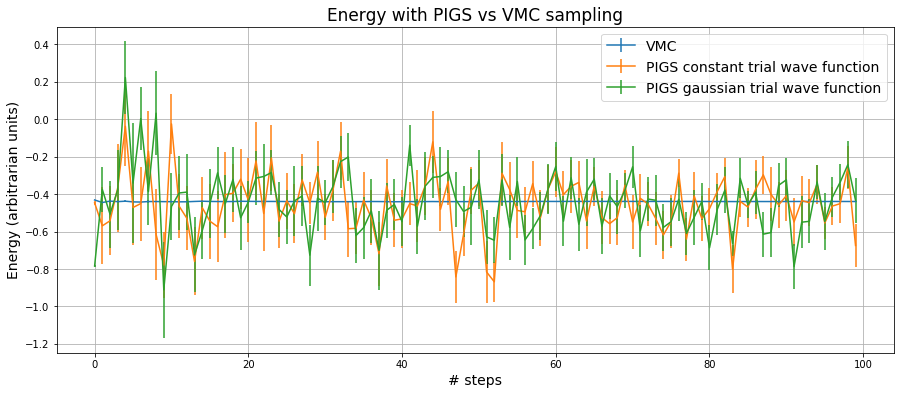

In [22]:
# ENERGY
#Wave function sampled with PIGS code (𝑇=0) with constant trial wave function Ψ𝑇(𝑥)=1
# vs VMC

##my VMC 
M=100
energy = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=3 )
steps = np.arange(M)
energy_err = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=4 )

## PIGS with constant trial wave function
N=300
x = np.loadtxt( './QMC_1D/kinetic.dat',max_rows=M, usecols=0 )
ek = np.loadtxt( './QMC_1D/kinetic.dat',max_rows=M, usecols=1 )
err_ek = np.loadtxt( './QMC_1D/kinetic.dat',max_rows=M, usecols=2 )
ep = np.loadtxt( './QMC_1D/potential.dat',max_rows=M, usecols=1 )
err_ep = np.loadtxt( './QMC_1D/potential.dat',max_rows=M, usecols=2 )

## PIGS with gaussian trial wave function
N=300
x2 = np.loadtxt( './QMC_1D/kinetic2.dat',max_rows=M, usecols=0 )
ek2 = np.loadtxt( './QMC_1D/kinetic2.dat',max_rows=M, usecols=1 )
err_ek2 = np.loadtxt( './QMC_1D/kinetic2.dat',max_rows=M, usecols=2 )
ep2 = np.loadtxt( './QMC_1D/potential2.dat',max_rows=M, usecols=1 )
err_ep2 = np.loadtxt( './QMC_1D/potential2.dat',max_rows=M, usecols=2 )

plt.figure(figsize=(15,6))

plt.errorbar(steps,energy, energy_err, label = "VMC")
plt.errorbar(x, ek+ep, err_ek+err_ep, label="PIGS constant trial wave function")
plt.errorbar(x2, ek2+ep2, err_ek2+err_ep2, label="PIGS gaussian trial wave function")
plt.xlabel('# steps',size=14)
plt.ylabel('Energy (arbitrarian units)',size=14)
plt.title("Energy with PIGS vs VMC sampling", size=17)
plt.legend(loc = "upper right", fontsize=14)
plt.grid(True)


**8.3.2 Reducing the imaginary time propagation** The following graph shows the sampled ditribution function with PIGS (using the gaussian function as trial function) for different values of the imaginary time.

In [ ]:
### 1. sampling positions VMC
a = 10
N = 500 # number of iterations
x = np.linspace(-a/2, a/2, N)
xmin = np.min(x)
xmax = np.max(x)
M=1000000
positions = np.loadtxt( 'instant_energy_posizioni2.dat',max_rows=M, usecols=1 )


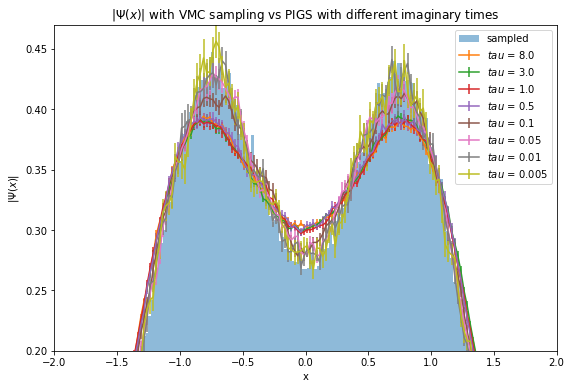

In [20]:
## PIGS with gaussian trial wave function, reducing tau
tau = [8.0, 3.0 , 1.0, 0.5, 0.1, 0.05, 0.01, 0.005 ]
names = [ "8.000000_", "3.000000_", "1.000000_", "0.500000_", "0.100000_", "0.050000_", "0.010000_", "0.005000_"]
plt.figure(figsize=(9,6))
plt.hist(positions, bins=(x), density=True, alpha=0.5, label="sampled")

for i in range(8):
    xp = np.loadtxt( './QMC_1D/' + names[i] + 'probability3.dat',max_rows=M, usecols=0 )
    pigs = np.loadtxt( './QMC_1D/' + names[i] + 'probability3.dat',max_rows=M, usecols=1 )
    err = np.loadtxt( './QMC_1D/' + names[i] + 'probability3.dat',max_rows=M, usecols=2 )

    plt.errorbar(xp, pigs, err, label = "$ tau $ = " + str(tau[i]))
    plt.xlabel("x")
    plt.ylabel("$|\Psi(x)|$")
    plt.gca().set_ylim(0.2, 0.47)
    plt.gca().set_xlim(-2., 2.)
    plt.legend(loc="upper right")
    plt.title("$|\Psi(x)|$ with VMC sampling vs PIGS with different imaginary times")
    
plt.show()

As can be noticed from the graph, the more similar result to the VMC histogram is given by $\tau = 0.01$. The following graph compares the energy of wave function sampled with the PIGS code with constant trial wave function $\Psi_T(x)=1$ and $\tau=0.01$ and the energy of the previous optimized VMC solution. As before, the two energies are compatible.

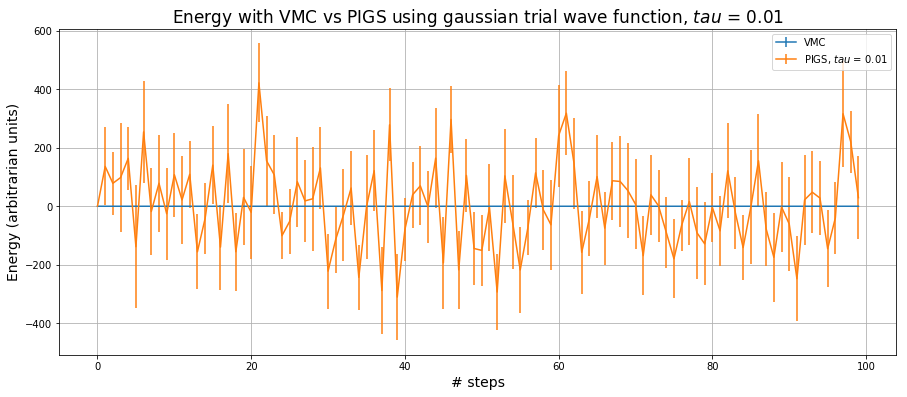

In [22]:
# ENERGIA
#Wave function sampled with PIGS code (𝑇=0) with gaussian trial wave function, tau = 0.01
# vs VMC

##my VMC
M=100
energy = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=3 )
steps = np.arange(M)
energy_err = np.loadtxt( 'medie_ottimizzato.dat',max_rows=M, usecols=4 )

## PIGS
N=300
x = np.loadtxt( './QMC_1D/0.010000_kinetic3.dat',max_rows=M, usecols=0 )
ek = np.loadtxt( './QMC_1D/0.010000_kinetic3.dat',max_rows=M, usecols=1 )
err_ek = np.loadtxt( './QMC_1D/0.010000_kinetic3.dat',max_rows=M, usecols=2 )
ep = np.loadtxt( './QMC_1D/0.010000_potential3.dat',max_rows=M, usecols=1 )
err_ep = np.loadtxt( './QMC_1D/0.010000_potential3.dat',max_rows=M, usecols=2 )

plt.figure(figsize=(15,6))

plt.errorbar(steps,energy, energy_err, label = "VMC")
plt.errorbar(x, ek+ep, err_ek+err_ep, label="PIGS, $tau$ = 0.01")
plt.xlabel('# steps', size=14)
plt.ylabel('Energy (arbitrarian units)', size=14)
plt.title("Energy with VMC vs PIGS using gaussian trial wave function, $tau$ = 0.01", size = 17)
plt.legend()
plt.grid(True)


**8.3.3 PIMC** The following graph reports histograms PIMC algorithm ($T>0$) with increasing temperatures.

In [32]:
### 1. sampling positions VMC
a = 10
N = 500 # number of iterations
x = np.linspace(-a/2, a/2, N)
xmin = np.min(x)
xmax = np.max(x)
M=1000000
positions = np.loadtxt( 'instant_energy_posizioni2.dat',max_rows=M, usecols=1 )


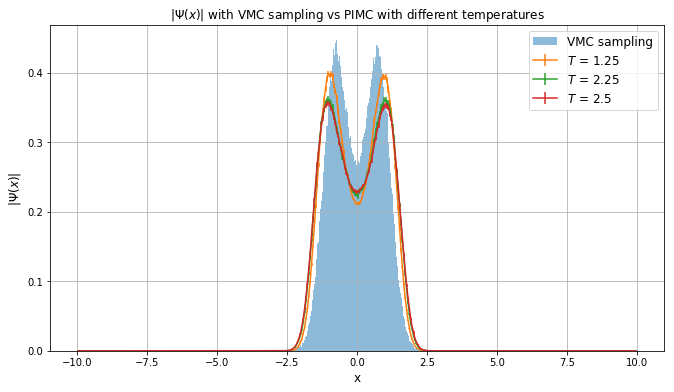

In [29]:
## PIMC with gaussian trial wave function and increasing temperature
M=400
temp = [1.25 , 2.25, 2.5]
names = [ "1.dat" , "2.dat", "3.dat"]
plt.figure(figsize=(11,6))
plt.hist(positions, bins=(x), density=True, alpha=0.5, label="VMC sampling")

for i in range(3):
    xp = np.loadtxt( './QMC_1D/probability_pimc' + names[i], usecols=0 )
    pigs = np.loadtxt( './QMC_1D/probability_pimc' + names[i], usecols=1 )
    err = np.loadtxt( './QMC_1D/probability_pimc' + names[i], usecols=2 )

    plt.errorbar(xp, pigs, err, label = "$ T $ = " + str(temp[i]))
    plt.xlabel("x",size=12)
    plt.ylabel("$|\Psi(x)|$",size=12)
    plt.legend(loc="upper right",fontsize=12)
    plt.title("$|\Psi(x)|$ with VMC sampling vs PIMC with different temperatures",size=12)
    plt.grid(True)
    
plt.show()